In [1]:
from husky_ppo_control import HuskyPPO
import cubic_spline_planner
import matplotlib.pyplot as plt
import time
import numpy as np
import math
%matplotlib tk

/home/sai/.conda/envs/deeprlbootcamp/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sai/.conda/envs/deeprlbootcamp/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sai/.conda/envs/deeprlbootcamp/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sai/.conda/envs/deeprlbootcamp/lib

In [2]:
husky_ppo = HuskyPPO()

In [ ]:
ax = [0.0,6.0, 12.5, 10.0, 17.5, 20.0, 25.0] 
ay = [0.0,-3.0, -5.0, 6.5, 3.0, 0.0, 0.0]
cx, cy, cyaw, ck, s = cubic_spline_planner.calc_spline_course(ax, ay, ds= 0.5)
plt.plot(cx, cy, "+")
plt.show()
cv = [3.0]*len(cx)
husky_ppo.set_waypoints_from_list(cx, cy, cyaw, cv)

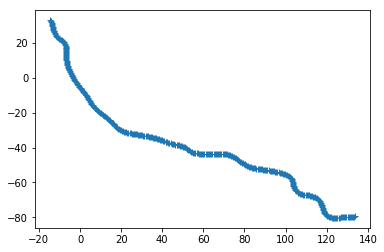

In [3]:
husky_ppo.read_waypoint_file("./unity_waypoints_bkp.txt")
cx = [i[0] for i in husky_ppo.waypoints_list]
cy = [i[1] for i in husky_ppo.waypoints_list]
plt.plot(cx, cy, "+")
plt.show()

In [4]:
def simulate_warthog(X, v, w, dt):
    xcurr = X[0] + v*math.cos(X[2])*dt
    ycurr = X[1] + v*math.sin(X[2])*dt
    thcurr = X[2]+w*dt
    return [xcurr, ycurr, thcurr]

In [5]:
#husky_ppo.set_pose([30.67, -33.33, 3.06])
husky_ppo.set_pose([120.180, -78.957, 140*math.pi/180.])
husky_ppo.set_twist([0. , 0.])
#husky_ppo.set_pose([0. , 0.5, 7*math.pi/4])
husky_ppo.read_tf_frozen_graph("/home/sai/hdd1/ml-master/ml-agents/config/ppo/results/wlong_path43/3DBall/frozen_graph_def.pb")

In [6]:
x_pose = []
y_pose = []
for i in range(0, 200):
    obs = husky_ppo.get_observation()
    twist = husky_ppo.get_control(np.array(obs).reshape(1,42))
    v = np.clip(twist[0][0], 0, 1) * 4.0
    w = np.clip(twist[0][1], -1, 1) * 2.5
    current_pose = simulate_warthog(husky_ppo.get_pose(), v, w, 0.05)
    #print(twist[0], current_pose)
    husky_ppo.set_pose(current_pose)
    husky_ppo.set_twist([v, w])
    x_pose.append(current_pose[0])
    y_pose.append(current_pose[1])

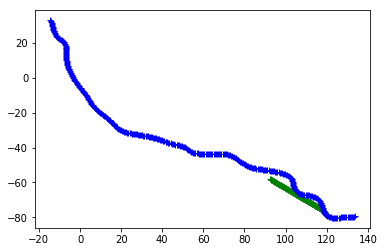

In [7]:
plt.cla()
plt.plot(x_pose, y_pose, '+g')
plt.plot(cx, cy, "+b")
#plt.xlim([0, 25])
#plt.ylim([-20, 7])

In [ ]:
obs = husky_ppo.get_observation()

In [ ]:
print(obs)

In [ ]:
print(husky_ppo.get_pose())

In [ ]:
husky_ppo.closest_idx

In [ ]:
2*math.pi - 6.1321

In [ ]:
i = 0
while i < len(obs)-3:
    print([obs[i], obs[i+1], obs[i+2], obs[i+3]])
    i = i + 4

In [ ]:
obs2 = [ 3.1718987e-01,  2.6397274e+00, -7.1165800e-02,  2.9253261e+00,
         8.2946199e-01,  2.4810174e+00, -2.3757100e-01,  2.9868939e+00,
         1.4194126e+00,  2.3704438e+00, -3.9009976e-01,  2.9857869e+00,
         2.0244434e+00,  2.2775273e+00, -4.8208833e-01,  3.2309980e+00,
         2.5908678e+00,  2.2095571e+00, -5.5408025e-01,  3.0272779e+00,
         3.1385303e+00,  2.1544523e+00, -5.6134295e-01,  2.8097680e+00,
         3.6512144e+00,  2.1172132e+00, -5.9754920e-01,  2.6893539e+00,
         4.2099533e+00,  2.0821514e+00, -6.1818290e-01,  2.6712611e+00,
         4.7472596e+00,  2.0539546e+00, -6.3812470e-01,  2.9293561e+00,
         5.2431216e+00,  2.0312028e+00, -6.4151406e-01,  2.9405370e+00,
         3.7776546e-03, -1.4553810e-03]

In [ ]:
i = 0
while i < len(obs2)-3:
    print([obs2[i], obs2[i+1], obs2[i+2], obs2[i+3]])
    i = i + 4